# Module 5 - Modern Portfolio Theory

   ### Welcome to the Answer notebook for Module 5 ! 
Make sure that you've submitted the module 4 notebook and unlocked Module 5 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 5.1 
5.1 For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. **( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')


In [148]:
stock = pd.read_csv("IDBI.csv")

In [245]:
pctchange = stock["Close Price"].pct_change()
stock["daily_return_mean"] = pctchange.rolling(window =1).mean()
stock["daily_std"] = pctchange.rolling(window = 2).std()
annual_mean = stock["daily_return_mean"] *(252)
annual_stdev = stock["daily_std"] * np.sqrt(252)

In [163]:
stock.dropna(inplace = True)

5.2 Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance )

In [98]:
data1 = pd.read_csv("ITC.csv")
data2 = pd.read_csv("IGL.csv")
data3 = pd.read_csv("LT.csv")
data4 = pd.read_csv("NCC.csv")
data5 = pd.read_csv("PVR.csv")

In [410]:
frame = [data1,data2,data3,data4,data5]
portfolio = pd.concat(frame,ignore_index = True)

In [411]:
pctchange = portfolio["Close Price"].pct_change()
portfolio["daily_return_mean"] = pctchange.rolling(1).mean()
portfolio["daily_std"] = pctchange.rolling(2).std()
annual_mean = portfolio["daily_return_mean"] *(252)
annual_stdev = portfolio["daily_std"] * np.sqrt(252)

5.3 Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

In [185]:
import seaborn as sns

In [412]:
portfolio.dropna(inplace = True)

In [416]:
def normalize(dataset):
    dataNorm=((dataset-dataset.mean())/(dataset.max()-dataset.min()))*1000
    return dataNorm

In [502]:
p = abs(normalize(sharpe_ratio))

In [506]:
cm = plt.cm.get_cmap('RdYlBu')

5.4 Mark the 2 portfolios where -
Portfolio 1 - The Sharpe ratio is the highest
Portfolio 2 - The volatility is the lowest. 

Text(0, 0.5, 'Returns')

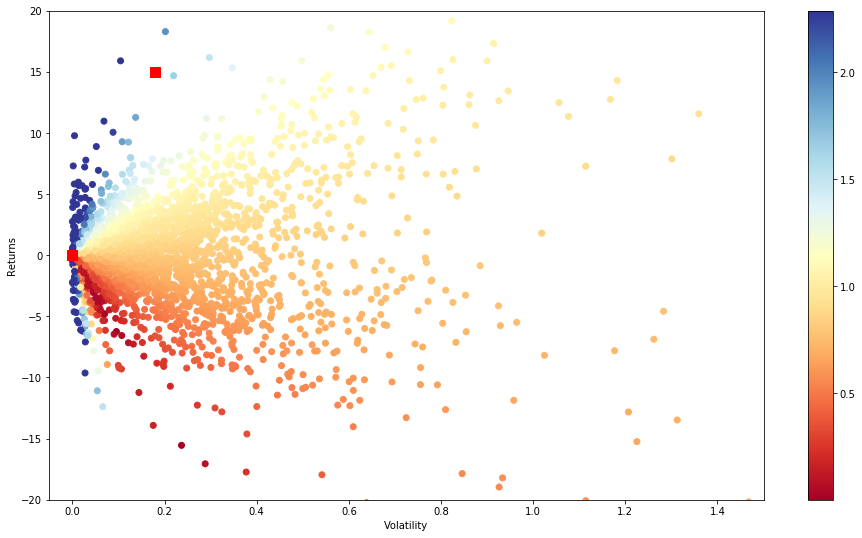

In [509]:
sharpe_ratio = annual_mean/annual_stdev 
fig = plt.figure(figsize = (16,9))

plt.ylim(-20,20)
plt.xlim((-0.05,1.5))

sc = plt.scatter(annual_stdev,annual_mean, c = p,vmin = p.min(),vmax = p.mean(),cmap = cm)
plt.colorbar(sc)
plt.scatter(x = annual_stdev.min(), y = 0 ,marker = 's', s = 10**2 ,color = "r")
plt.scatter(x = 0.18 ,y = 15 ,marker = 's', s = 10**2 ,color = "r" )
plt.xlabel("Volatility")
plt.ylabel("Returns")